<a href="https://colab.research.google.com/github/TrinhHoangKhang/AI-mini-project/blob/main/9.%20Decision%20tree/Classification/Credit_card_default_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [27]:
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data_warmup ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df_warmup = pd.DataFrame(data_warmup, columns=data_warmup.keys())
df_warmup

,age,income,student,credit_rate,default
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


We will use decision tree to find if a person default their card or not

In [26]:
one_hot_warmup = pd.get_dummies(df_warmup[attribute_names], drop_first=True)
x_warmup = one_hot_warmup.iloc[:, :].values
y_warmup = df_warmup[class_name].values
one_hot_warmup

,age_senior,age_youth,income_low,income_medium,student_yes,credit_rate_fair
0,False,True,False,False,False,True
1,False,True,False,False,False,False
2,False,False,False,False,False,True
3,True,False,False,True,False,True
4,True,False,True,False,True,True
5,True,False,True,False,True,False
6,False,False,True,False,True,False
7,False,True,False,True,False,True
8,False,True,True,False,True,True
9,True,False,False,True,True,True


Create classifier (GINI)

In [19]:
classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=1
    )

classifier.fit(x_warmup, y_warmup)

DecisionTreeClassifier(max_depth=4)

Plot the result

[Text(0.6, 0.9, 'student_yes <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.4, 0.7, 'age_youth <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3, 0.5, 'credit_rate_fair <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'age_senior <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.7, 'credit_rate_fair <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.7, 0.5, 'age_senior <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

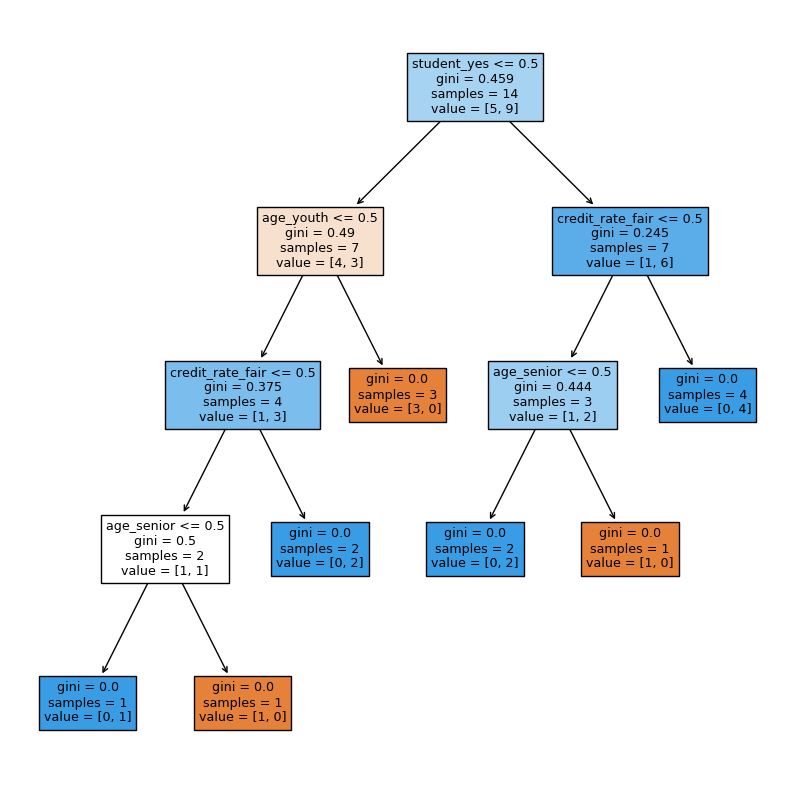

In [25]:
plot, ax = plt.subplots(figsize=(10, 10))
plot_tree(
    classifier,
    ax=ax,
    feature_names = one_hot_warmup.columns.tolist(),
    filled = True)

Create classifier (Entropy)

In [28]:
classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=1
)
classifier.fit(x_warmup, y_warmup)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Plot the result

[Text(0.5, 0.9, 'student_yes <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'age_youth <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.5, 'age_senior <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.3, 'credit_rate_fair <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.7, 'age_senior <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'credit_rate_fair <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

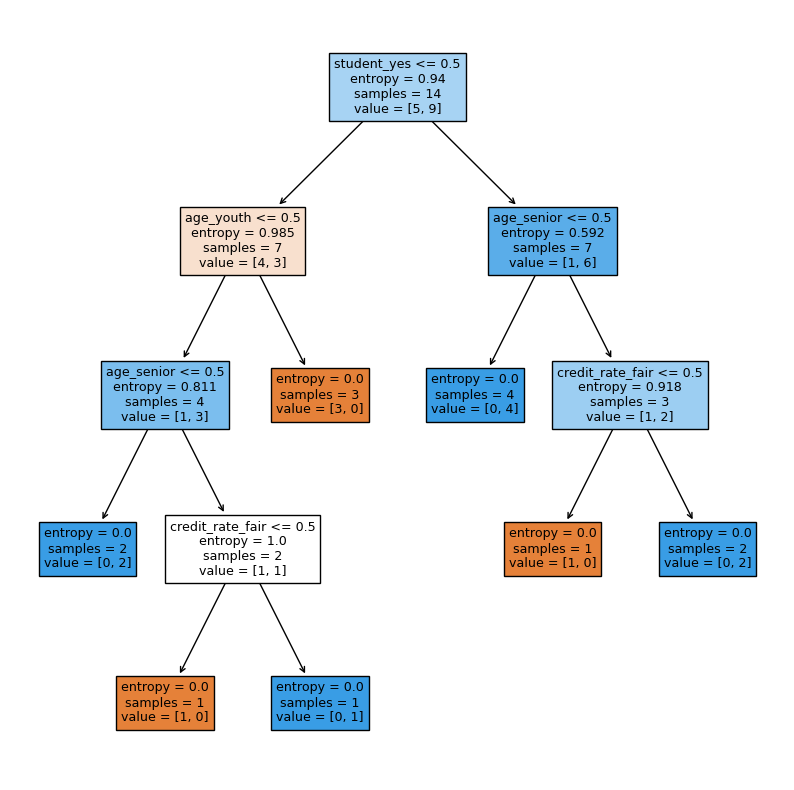

In [30]:
plot, ax = plt.subplots(figsize=(10, 10))
plot_tree(
    classifier,
    ax=ax,
    feature_names = one_hot_warmup.columns.tolist(),
    filled = True)